In [440]:
import numpy as np
import matplotlib.pyplot as plt

In [441]:
lr=0.01
n_iters=1000
weights = None
bias = None

In [442]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def fit(X, y):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_iters):
        linear_pred = np.dot(X, weights) + bias
        predictions = sigmoid(linear_pred)
        dw = (1/n_samples) * np.dot(X.T, (predictions - y))
        db = (1/n_samples) * np.sum(predictions-y)
        weights = weights - lr*dw
        bias = bias - lr*db
    
    return weights, bias


def predict(X, weights, bias):
    linear_pred = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_pred)
    return y_pred

In [443]:
# Load data from text file
data = np.loadtxt("multi_class_classification_data_group_5_train (2).txt", delimiter='\t',  skiprows=1)

# Split data into features (X) and targets (y)
X = data[:, :25]  # Features
y = data[:, 25:]  # Targets

def split(X,y):
    print(f'X_shape: ',X.shape)
    print(f'y_shape: ',y.shape)

    # Get number of samples
    num_samples = X.shape[0]

    # Shuffle indices
    indices = np.random.permutation(num_samples)

    # Determine split sizes
    train_size = int(0.7 * num_samples)
    test_size = num_samples - train_size

    # Split indices into train and test sets
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    # Split data into train and test sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    print(f'X_train_shape: ',X_train.shape)
    print(f'y_train_shape: ',y_train.shape)
    print(f'X_test_shape: ',X_test.shape)
    print(f'y_test_shape: ',y_test.shape)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X,y)

X_shape:  (70000, 25)
y_shape:  (70000, 1)
X_train_shape:  (49000, 25)
y_train_shape:  (49000, 1)
X_test_shape:  (21000, 25)
y_test_shape:  (21000, 1)


In [447]:
y_train = y_train.ravel()
y_train = y_train.astype(int)
print(f"y_train: {y_train}",)
y_pred = np.zeros((y_test.shape[0],10))
y_classes = np.zeros((y_train.shape[0],10))
for i in range(10):
    y_class = np.where(y_train == i, 1, 0)
    print(f"y_train for class {i}: {y_class}")
    y_classes[:,i] = y_class
    weights, bias = fit(X_train,y_class)
    y_pred[:,i] = predict(X_test, weights, bias)

max_indices = np.argmax(y_pred, axis=1)
print(max_indices)

y_train: [2 5 1 ... 3 0 3]
y_train for class 0: [0 0 0 ... 0 1 0]
y_train for class 1: [0 0 1 ... 0 0 0]
y_train for class 2: [1 0 0 ... 0 0 0]
y_train for class 3: [0 0 0 ... 1 0 1]
y_train for class 4: [0 0 0 ... 0 0 0]
y_train for class 5: [0 1 0 ... 0 0 0]
y_train for class 6: [0 0 0 ... 0 0 0]
y_train for class 7: [0 0 0 ... 0 0 0]
y_train for class 8: [0 0 0 ... 0 0 0]
y_train for class 9: [0 0 0 ... 0 0 0]
[1 1 9 ... 8 2 8]


In [445]:
y_test = y_test.ravel()
y_test = y_test.astype(int)

def accuracy(max_indices, y_test):
    return np.sum(max_indices==y_test)/len(y_test)

acc = accuracy(max_indices, y_test)
print(f"Accuracy for one over rest classifier: ",acc)

Accuracy for one over rest classifier:  0.2845714285714286


### ROC

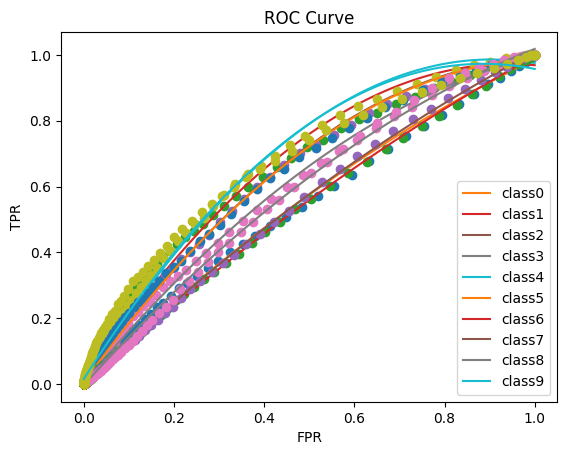

Empirical Riskfor all classes:  [0.1, 0.1014, 0.0965, 0.1019, 0.1016, 0.1, 0.1018, 0.0992, 0.0989, 0.099]


In [450]:
y_class_pred = np.zeros((y_test.shape[0],10))
y_test_classes = np.zeros((y_test.shape[0],10))
TPR = np.zeros((1,10))
FPR = np.zeros((1,10))
threshold = numbers = np.arange(0, 1.005, 0.005).tolist()
emp_risk = []
for i in range(10):
    points = np.zeros((len(threshold),2))
    for idx,k in enumerate(threshold):
        y_class_pred[:,i] = np.where(max_indices == i, 1, 0)
        y_test_classes[:,i] = np.where(y_test == i, 1, 0)
        TP = np.sum((y_pred[:, i] >= k) & (y_test_classes[:, i] == 1))
        FP = np.sum((y_pred[:, i] >= k) & (y_test_classes[:, i] == 0))
        TN = np.sum((y_pred[:, i] < k) & (y_test_classes[:, i] == 0))
        FN = np.sum((y_pred[:, i] < k) & (y_test_classes[:, i] == 1))
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        points[idx]=[FPR, TPR]
    
    
    emp_risk.append(round((FP+FN)/y_pred.shape[0],4))
    coefficients = np.polyfit(points[:,0],points[:,1], 2)

    # Generate x values for smooth curve
    x_smooth = np.linspace(min(points[:,0]), max(points[:,0]), 100)

    # Evaluate polynomial at x_smooth
    y_smooth = np.polyval(coefficients, x_smooth)

    # Plot the original points and the fitted curve
    plt.title('ROC Curve')
    plt.plot(points[:,0], points[:,1], 'o')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(x_smooth, y_smooth, label=f'class{i}')
    plt.legend()


plt.show()
print(f"Empirical Riskfor all classes: ",emp_risk)